# Set up model and hyperparameters

In [ ]:
from models.WaveNetVAE.WaveVae import WaveNetVAE
from models.WaveNetVAE.WVData import WVDataset
import torch
from torch.utils.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

"""
Hyperparameters
"""

learning_rate = 0.000001
batchsize = 2
device='cuda:2'
input_size = (40, 112)
upsamples = [2, 2, 2, 2, 2, 2, 2, 2]
zsize = 32

WaveVAE = WaveNetVAE(input_size,
                     num_hiddens = 768,
                     upsamples = upsamples,
                     zsize = zsize,
                    out_channels = 256)

WaveVAE.to(device)

VAEDataset = WVDataset(audio_path = "../ConvDenoiser_Old/clips",
                       length = 4096,
                       skip_size = 4096 // 2,
                       sample_rate = 24000,
                       max_files = 50,
                       hop_length = 128)

val_VAEDataset = WVDataset(audio_path = "../ConvDenoiser_Old/testdata",
                       length = 4096,
                       skip_size = 4096 // 2,
                       sample_rate = 24000,
                       max_files = 200,
                       hop_length = 128)

VAEDataloader = DataLoader(VAEDataset,
                           batch_size = batchsize,
                           shuffle = True)

val_VAEDataloader = DataLoader(val_VAEDataset,
                           batch_size = batchsize,
                           shuffle = False)

WaveNet Receptive Field:  4093


Loading and preprocessing files to dataset.:   0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/57 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/47 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/49 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

  0%|          | 0/66 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

Loading and preprocessing files to dataset.:   0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/80 [00:00<?, ?it/s]

  0%|          | 0/54 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/24 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/34 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

# Test tensor

Trying tensors with sizes:
Onehot size:  torch.Size([1, 4096]) | MFCC size:  torch.Size([1, 40, 33]) | Target size:  torch.Size([1, 4097])


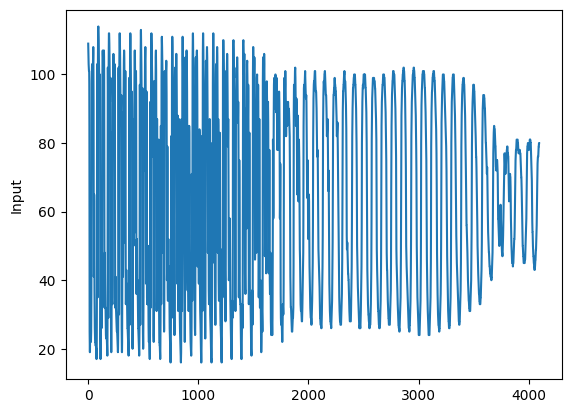

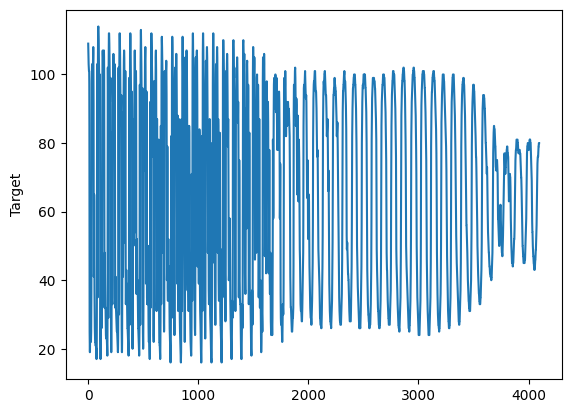

Target value:  80  | Input Value:  80
torch.Size([1, 4097])
Tensors passed through model succesfully torch.Size([1, 4096, 256])


IndexError: too many indices for tensor of dimension 1

In [18]:
import torchaudio
import matplotlib.pyplot as plt

# loss_fn = torch.nn.MSELoss()
loss_fn = torch.nn.CrossEntropyLoss(reduction='none')

onehot, mfcc, target = next(iter(VAEDataloader))
onehot = onehot.to(device)
mfcc = mfcc.to(device)
target = target.to(device)

print("Trying tensors with sizes:")
print("Onehot size: ", onehot.size(), "| MFCC size: ", mfcc.size(), "| Target size: ", target.size())

plt.plot(torch.squeeze(onehot[0]).cpu().numpy())
plt.ylabel('Input')
plt.show()

plt.plot(torch.squeeze(target[0]).cpu().numpy())
plt.ylabel('Target')
plt.show()



print("Target value: ", target[0, -1].item(), " | Input Value: ", onehot[0, -1].item())

# target = torch.unsqueeze(torch.unsqueeze(target[:, -1], 1), 1)
print(target.size())

output, _, _ = WaveVAE(onehot, mfcc, True)
output = output.transpose(2,1)
print("Tensors passed through model succesfully", output.size())

reconstruction_loss = torch.mean(loss_fn(torch.squeeze(output), torch.squeeze(target)[:, 1:])[-1], 0)

print(output[0, 4095:].contiguous().view(1, 256).size(), target[0, 4096:].contiguous().view(-1).size())
print(torch.argmax(output[0, -1].squeeze()), target[0, -1].squeeze().item(), onehot[0, -1].squeeze().item())

# reconstruction_loss = loss_fn(output[:, :, -1], target[:, :, -1])
print("Reconstruction loss =", reconstruction_loss.item())

# onehot = torch.nn.functional.sigmoid(onehot[0, :, -1])
# output = torch.nn.functional.sigmoid(output[0, :, -1])
# onehotmax = torch.argmax(onehot)
# outputmax = torch.argmax(output)

print(onehot[0, :, -1].item(), output[0, :, -1].item(), target[0, :, -1].item())




# Start training

In [2]:
from models.WaveNetVAE.train import train
from torch.utils.tensorboard import SummaryWriter
import warnings
warnings.filterwarnings("ignore")
writer = SummaryWriter()

train(WaveVAE, VAEDataloader, val_VAEDataloader, 
      writer = writer, 
      learning_rate = 0.0001,
      epoch_amount = 100,
      logs_per_epoch = 5,
      kl_anneal = 0.01,
      max_kl = 0.5,
      device = device)


Training. Epoch: 0. Loss for step 1: n.v.t.:   0%|          | 0/2087 [00:00<?, ?it/s]

Validating:   0%|          | 0/1535 [00:00<?, ?it/s]

Validating:   0%|          | 0/1535 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [3]:
torch.save(WaveVAE.state_dict(), './modeltest')

# Generate Audio

In [1]:
from models.WaveNetVAE.WaveVae import WaveNetVAE
from models.WaveNetVAE.WVData import WVDataset
import torch
from torch.utils.data import DataLoader
import warnings
warnings.filterwarnings("ignore")

"""
Hyperparameters
"""

learning_rate = 0.000001
batchsize = 4
device='cuda:2'
input_size = (40, 112)
upsamples = [2, 2, 2, 2, 2, 2, 2, 2]
zsize = 32

WaveVAE = WaveNetVAE(input_size,
                     num_hiddens = 768,
                     upsamples = upsamples,
                     zsize = zsize,
                    out_channels = 1)

WaveVAE.to(device)

WaveVAE.load_state_dict(torch.load('./modeltest'))

WaveNet Receptive Field:  4093


<All keys matched successfully>

In [3]:
# val_VAEDataset = WVDataset(audio_path = "../ConvDenoiser_Old/testdata",
#                        length = 4096,
#                        skip_size = 1,
#                        sample_rate = 24000,
#                        max_files = 1,
#                        hop_length = 128)

# val_VAEDataloader = DataLoader(val_VAEDataset,
#                            batch_size = 1,
#                            shuffle = False)
with torch.no_grad():
    generated_audio = WaveVAE.inference(val_VAEDataloader, size = 4096, device = device)

torch.Size([1, 1, 4096])


  0%|          | 0/4096 [00:00<?, ?it/s]

In [4]:
import IPython
print(generated_audio.size())
generated_audio_proc = (generated_audio * 2) - 1
IPython.display.display(IPython.display.Audio(generated_audio_proc.squeeze().detach().cpu().numpy(), rate = 24000))

torch.Size([1, 1, 8192])


torch.Size([1, 1, 4096])


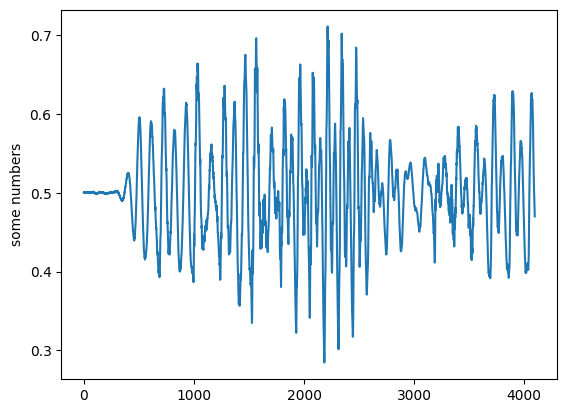

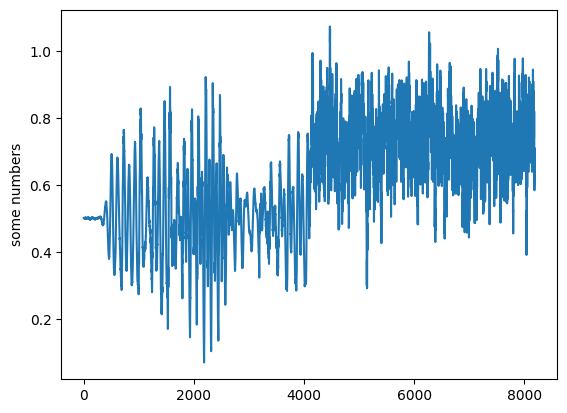

In [5]:
onehot, mfcc, target = next(iter(val_VAEDataloader))

import matplotlib.pyplot as plt
print(onehot[:, :, -4096:].size())
plt.plot(torch.squeeze(onehot[:, :, -4096:]).numpy())
plt.ylabel('some numbers')
plt.show()

plt.plot(torch.squeeze(generated_audio_proc.cpu() + 1 / 2).numpy())
plt.ylabel('some numbers')
plt.show()

In [8]:
%pip install matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 55.4 MB/s eta 0:00:0000:0100:01
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.3/300.3 kB 69.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 82.3 MB/s eta 0:00:00
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
Note: you may need to restart the kernel to use updated packages.
